In [17]:
import pandas as pd
import glob
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("always")
import helpers
%matplotlib inline


### Notebook for an analysis

DISCLAIMER: I took some basic things from this notebook from classes with Bartosz Bieganowski (Automatic Transactional Systems)

The notebook can be expanded as much as we want. In fact, we are not going to implement algorithm (I might later), because it is less fun than this explanatory data analysis

In [3]:
# latest_backtest = max(os.listdir('backtests'), key=lambda x: os.path.getmtime(os.path.join('backtests', x)))
# content = open(os.path.join('backtests', latest_backtest), 'r').readlines()
chosen_backtest = "round1.log"
content = open(os.path.join('backtests', chosen_backtest), 'r').readlines()

C:\Users\corin\AppData\Local\Temp\ipykernel_22648\1360508012.py:4: ResourceWarning: unclosed file <_io.TextIOWrapper name='backtests\\round1.log' mode='r' encoding='cp65001'>
  content = open(os.path.join('backtests', chosen_backtest), 'r').readlines()


In [5]:
trades_df, activity_logs_df, sandbox_logs = helpers.wrangle_backtest(content)

In [7]:
print(trades_df.columns)

Index(['timestamp', 'buyer', 'seller', 'symbol', 'currency', 'price',
       'quantity'],
      dtype='object')


In [9]:
trades_df['total'] = trades_df['price'].astype(float) * trades_df['quantity'].astype(float)
total_profit = trades_df['total'].sum()
print(f"💰 Total Profit from Round 1: {total_profit:.2f}")

💰 Total Profit from Round 1: 358983142.00


In [10]:
my_trades = trades_df[
    (trades_df['buyer'] == 'SUBMISSION') | 
    (trades_df['seller'] == 'SUBMISSION')
]

In [12]:
my_trades['total'] = my_trades['price'].astype(float) * my_trades['quantity'].astype(float)
my_profit = my_trades['total'].sum()
print(f"💼 Profit from My Team (SUBMISSION): {my_profit:.2f}")

💼 Profit from My Team (SUBMISSION): 271520854.00


C:\Users\corin\AppData\Local\Temp\ipykernel_22648\2302765586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_trades['total'] = my_trades['price'].astype(float) * my_trades['quantity'].astype(float)


In [13]:
instrument = "AMETHYSTS"

ob = activity_logs_df[activity_logs_df['product'] == instrument]
rades = trades_df[trades_df['symbol'] == instrument]

my_buys = trades_df[trades_df['buyer'] == 'SUBMISSION']
my_sells = trades_df[trades_df['seller'] == 'SUBMISSION']
other_trades = trades_df[(trades_df['buyer'] != 'SUBMISSION') & (trades_df['seller'] != 'SUBMISSION')]

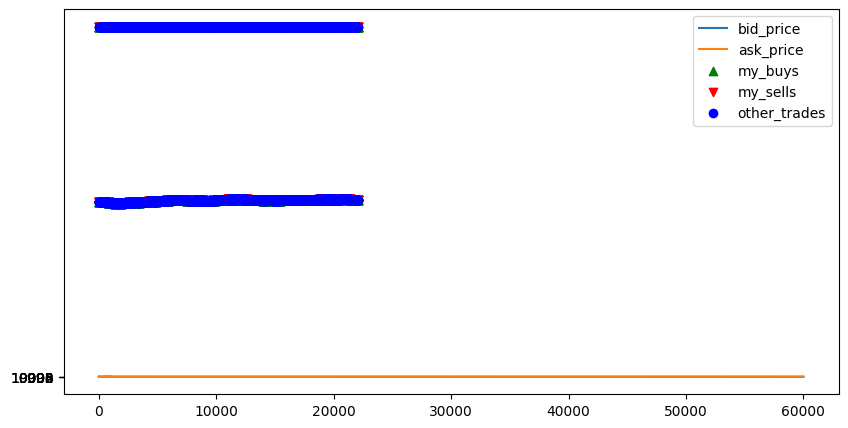

In [18]:
# Here matplotlib qt is used for displaying graphs in different windows, etc. If you want to disable it, hash it above
plt.figure(figsize=(10, 5))
plt.plot(ob['bid_price_1'], label='bid_price')
plt.plot(ob['ask_price_1'], label='ask_price')
plt.scatter(my_buys.index, my_buys['price'], label='my_buys', color='green', marker='^')
plt.scatter(my_sells.index, my_sells['price'], label='my_sells', color='red', marker='v')
plt.scatter(other_trades.index, other_trades['price'], label='other_trades', color='blue', marker='o')
plt.legend()
plt.show()


In [26]:
for col in cols_to_convert:
    ob.loc[:, col] = pd.to_numeric(ob[col], errors="coerce")

In [27]:
# here you can see how I calculated the mid. In general it is best to use VWAP (volume-weighted average price), so you also level 2 data, but you can decide whatever
ob["mid"] = (ob["bid_price_1"] + ob["ask_price_1"])/2
ob["mid_lev2"]= (ob["bid_price_2"] + ob["ask_price_2"])/2
ob["weighted_mid"]= (ob["bid_price_1"] * ob["bid_volume_1"] + ob["ask_price_1"] * ob["ask_volume_1"])/ (ob["bid_volume_1"]+ob["ask_volume_1"])

ob["mid_fv_divergance"] = ob["mid_lev2"] - ob["mid"]

C:\Users\corin\AppData\Local\Temp\ipykernel_22648\2767755538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ob["mid"] = (ob["bid_price_1"] + ob["ask_price_1"])/2
C:\Users\corin\AppData\Local\Temp\ipykernel_22648\2767755538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ob["mid_lev2"]= (ob["bid_price_2"] + ob["ask_price_2"])/2
C:\Users\corin\AppData\Local\Temp\ipykernel_22648\2767755538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [28]:
AMday0 = ob.query("day == 0")
AMday1 = ob.query("day == -1")
AMday2 = ob.query("day == -2")

In [29]:
AMday0["spread"] = AMday0["bid_price_1"] - AMday0["ask_price_1"]
AMday1["spread"] = AMday1["bid_price_1"] - AMday1["ask_price_1"]
AMday2["spread"] = AMday2["bid_price_1"] - AMday2["ask_price_1"]

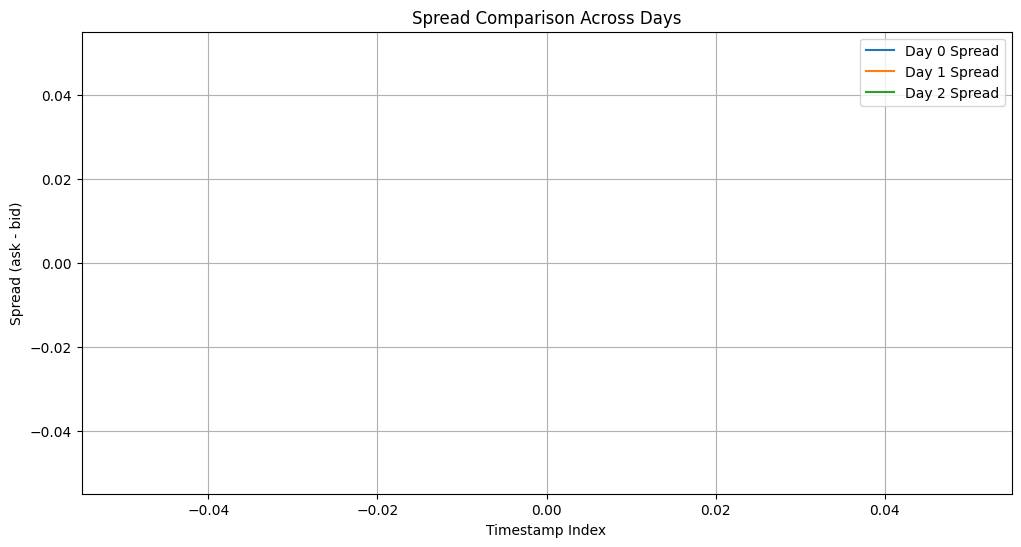

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(AMday0["spread"], label="Day 0 Spread")
plt.plot(AMday1["spread"], label="Day 1 Spread")
plt.plot(AMday2["spread"], label="Day 2 Spread")
plt.title("Spread Comparison Across Days")
plt.xlabel("Timestamp Index")
plt.ylabel("Spread (ask - bid)")
plt.legend()
plt.grid(True)
plt.show()

Summary of Our Round 1 Trading Analysis

In this notebook, we have analyzed market activity around the instrument "AMETHYSTS" over three different days. Our focus was to understand how the spread (difference between ask and bid prices) changed and how our team performed in the market.

### Team Performance
- The total profit generated in the market was approximately **35.9 million**.
- Our team (labelled as "SUBMISSION") earned about **27.1 million**, which shows we were very active and made competitive trades.

Observations on Market Spread
- We plotted bid and ask prices alongside our own trades and others in the market. This helped us visualize how close we were to the best prices.
- The spreads were fairly tight on all days, meaning the market was efficient.
- We also calculated and compared the spread across three days. The plot didn’t show much variation, suggesting the market conditions were quite stable.

 Takeaways
- Our trading decisions seemed well-timed and placed, especially given our strong performance.
- Spread stability implies consistent liquidity, which is good for making frequent trades without large price slippage.

This analysis helps us better understand how spread affects profitability and confirms that our team’s activity was aligned with good trading conditions.